In [1]:
import numpy as truenp

import matplotlib.pyplot as plt
import matplotlib.cm as color
better_magma = color.magma
better_magma.set_bad('black',1.)
import matplotlib.colors as c

from prysm import (
    mathops, 
    conf,
)
from prysm.mathops import (
    np,
    fft,
    interpolate,
    ndimage,
)
from prysm.coordinates import (
    make_xy_grid, 
    cart_to_polar,
)
from prysm.propagation import Wavefront as WF
from prysm.propagation import (
    focus_fixed_sampling,
    focus_fixed_sampling_backprop
)                              
from prysm.thinlens import (
    defocus_to_image_displacement,
    image_displacement_to_defocus,
)
from prysm.geometry import (
    circle,
    spider,
)
from prysm.polynomials import (
    lstsq,
    noll_to_nm,
    zernike_nm,
    zernike_nm_seq,
    hopkins,
    sum_of_2d_modes,
    sum_of_2d_modes_backprop
)
mathops.set_backend_to_cupy()

from utils import generate_freqs, kneePSD, generate_time_series

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [92]:
f_max = 1 # hz
t_max = 5 * 3600 # sec
f_knee = (1 / (2 * 3600)) # hz
slope = 4
rms = 10e-6 # m

freqs, times = generate_freqs(Nf=2**18+1, f_max=f_max)
psd = kneePSD(freqs, 1, f_knee, slope)

modes = 5
coeffs = np.zeros((modes, len(times)))

for i in range(modes):
    coeffs[i, :] = generate_time_series(psd, f_max, rms=1, seed=727 + i)
    coeffs[i, :] -= coeffs[i, 0]

coeffs = coeffs[:, times < t_max]
times = times[times < t_max]

for i in range(modes):
    coeffs[i, :] *= rms / np.sqrt(np.mean(coeffs[i, :] ** 2))

interval = float(times[1] - times[0])
print(interval)

0.5


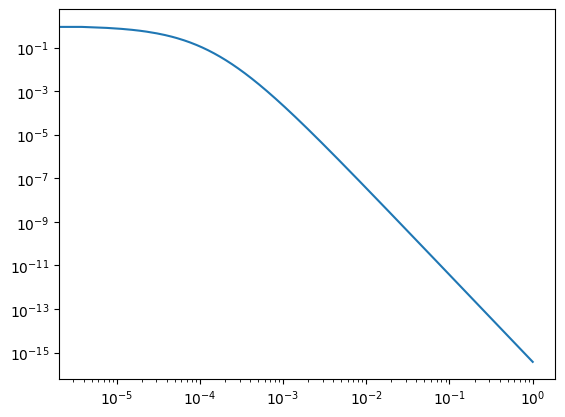

In [93]:
plt.loglog(freqs.get(), psd.get())

In [85]:
print(coeffs[0, 2])
print(coeffs[1, 2])
print(coeffs[2, 2])
print(coeffs[3, 2])
print(coeffs[4, 2])

-1.3353974128113034e-09
4.879951637338273e-09
7.61315399438271e-09
-1.1651366067219731e-08
-3.978815910839844e-09


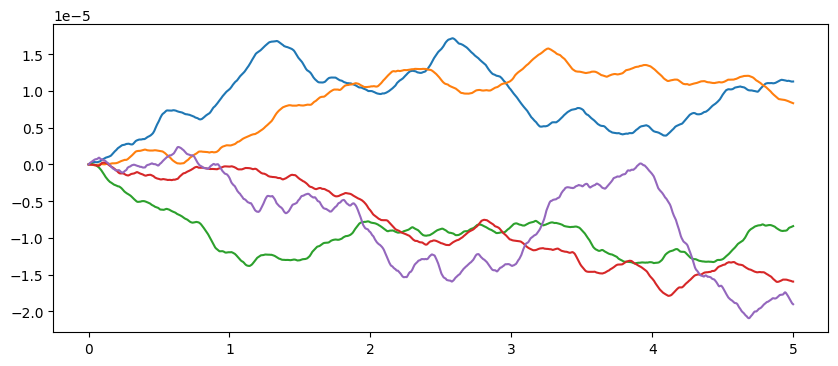

In [94]:
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.plot(times.get() / 3600, coeffs[i, :].get())

In [103]:
x, y = make_xy_grid(1024, diameter=1)
r, t = cart_to_polar(x, y)

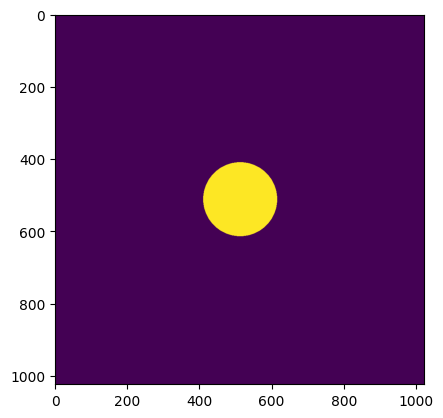

In [104]:
A = circle(0.1, r)

plt.imshow(A.get())